In [31]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, FunctionTransformer
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold

from models.prepareData import getData, convertData
from models.models import linearRegressionModel, PolynomialFeatures, polynomialRegression

In [32]:
# data = getData('Bán căn hộ chung cư', 'Nguyễn Hữu Thọ', 'Phước Kiển', 'Nhà Bè')
# data = getData('Bán căn hộ chung cư', 'Nguyễn Hữu Cảnh', '22', 'Bình Thạnh')
# data = getData('Bán đất', 'Trần Văn Giàu', 'Lê Minh Xuân', 'Bình Chánh')
# data = getData('Bán đất', 'Vườn Lài', 'An Phú Đông', '12')
# data = getData('Bán nhà riêng', 'Quốc Lộ 13', 'Hiệp Bình Phước', 'Thủ Đức')
# data = getData('Bán nhà riêng', 'Phạm Văn Chiêu', '9', 'Gò Vấp')
# data = getData('Bán nhà riêng', 'Nguyễn Văn Quá', 'Đông Hưng Thuận', '12')
data = getData('Bán nhà riêng', 'Quốc Lộ 13', 'Hiệp Bình Phước', 'Thủ Đức')

In [33]:
print("Sample data: ")
print("--------------------------------------------------------")
print(data.head())
print("--------------------------------------------------------")
print("Data Length: ", len(data))

Sample data: 
--------------------------------------------------------
       post_type   area  price      street             ward district  \
0  Bán nhà riêng  110.0   5.79  Quốc Lộ 13  Hiệp Bình Phước  Thủ Đức   
1  Bán nhà riêng    2.0   2.20  Quốc Lộ 13  Hiệp Bình Phước  Thủ Đức   
2  Bán nhà riêng   55.0   7.60  Quốc Lộ 13  Hiệp Bình Phước  Thủ Đức   
3  Bán nhà riêng   54.0   5.45  Quốc Lộ 13  Hiệp Bình Phước  Thủ Đức   
4  Bán nhà riêng  104.0   9.60  Quốc Lộ 13  Hiệp Bình Phước  Thủ Đức   

  posted_date  
0  2021-04-13  
1  2021-04-14  
2  2021-04-14  
3  2021-04-14  
4  2021-04-16  
--------------------------------------------------------
Data Length:  205


In [34]:
# preporcess data:
# sort data in post_date order:
data = data.sort_values(by=['posted_date'])

# Drop duplicates:    
data = data.drop_duplicates(subset='area', keep='last', inplace=False)

# remove outlier:
# area_upper_bound = data['area'].quantile(0.95)
# area_lower_bound = data['area'].quantile(0.05)
# price_upper_bound = data['price'].quantile(0.95)
# price_lower_bound = data['price'].quantile(0.05)

# data = data[
#     (data['area'] < area_upper_bound) &
#     (data['area'] > area_lower_bound) &
#     (data['price'] < price_upper_bound) &
#     (data['price'] > price_lower_bound)
# ]

In [35]:
# divide data into train and test:
train_data, test_data = train_test_split(data, test_size=0.2)
train_data, validate_data = train_test_split(train_data, test_size=0.2)

In [36]:
# Sort data by area column:
train_data = train_data.sort_values(by=['area'])
test_data = test_data.sort_values(by=['area'])
validate_data = validate_data.sort_values(by=['area'])

print("\nTrain data length: ", len(train_data))
print("Test data length: ", len(test_data))
print("Validate data length: ", len(validate_data))


Train data length:  48
Test data length:  16
Validate data length:  13


In [37]:
# convert data into numpy
X_train, Y_train = convertData(train_data)
X_test, Y_test = convertData(test_data)
X_validate, Y_validate = convertData(validate_data)

In [38]:
# scale data:
X_train = QuantileTransformer(n_quantiles=len(X_train)-1, output_distribution='uniform').fit_transform(X_train)
Y_train = QuantileTransformer(n_quantiles=len(Y_train)-1, output_distribution='uniform').fit_transform(Y_train)

X_test = QuantileTransformer(n_quantiles=len(X_test)-1, output_distribution='uniform').fit_transform(X_test)
Y_test = QuantileTransformer(n_quantiles=len(X_test)-1, output_distribution='uniform').fit_transform(Y_test)

X_validate = QuantileTransformer(n_quantiles=len(X_validate)-1, output_distribution='uniform').fit_transform(X_validate)
Y_validate = QuantileTransformer(n_quantiles=len(Y_validate)-1, output_distribution='uniform').fit_transform(Y_validate)

# X_train = PowerTransformer(method='yeo-johnson').fit_transform(X_train)
# Y_train = PowerTransformer(method='yeo-johnson').fit_transform(Y_train)

# X_test = PowerTransformer(method='yeo-johnson').fit_transform(X_test)
# Y_test = PowerTransformer(method='yeo-johnson').fit_transform(Y_test)

# X_validate = PowerTransformer(method='yeo-johnson').fit_transform(X_validate)
# Y_validate = PowerTransformer(method='yeo-johnson').fit_transform(Y_validate)

# X_train = FunctionTransformer(np.log1p).fit_transform(X_train)
# Y_train = FunctionTransformer(np.log1p).fit_transform(Y_train)

# X_test = FunctionTransformer(np.log1p).fit_transform(X_test)
# Y_test = FunctionTransformer(np.log1p).fit_transform(Y_test)

# X_validate = FunctionTransformer(np.log1p).fit_transform(X_validate)
# Y_validate = FunctionTransformer(np.log1p).fit_transform(Y_validate)

In [39]:
# find model by using linear regression:
linear_model = linearRegressionModel(X_train, Y_train)

# find Y by using linear model predict:
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)

# Calculate RMSE on train and test data:
train_linear_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
test_linear_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))


Linear Regression Model: 


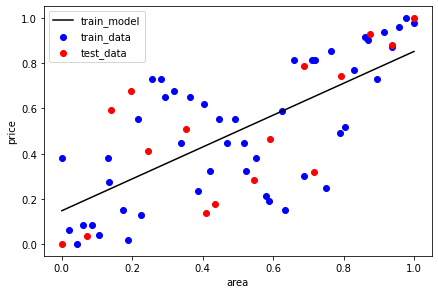

In [40]:
print("\nLinear Regression Model: ")
# Plot linear model:
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.plot(X_train, Y_train_pred, color='black', label='train_model')
plt.legend()
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [41]:
# Linear Model coefficient and intercept:
print("Linear model coefficient: {}".format(linear_model.coef_))
print("Linear model intercept: {}".format(linear_model.intercept_))

# linear_model rmse:
print("Linear model rmse on train data: {}".format(train_linear_rmse))
print("Linear model rmse on test data: {}".format(test_linear_rmse))
print("\n\n")

Linear model coefficient: [[0.70248974]]
Linear model intercept: [0.1488102]
Linear model rmse on train data: 0.2115262803082313
Linear model rmse on test data: 0.21920122085543742





In [42]:
# find model by using polynomial regression:
poly_model, degree, validate_rmse, test_rmse = polynomialRegression(X_train, Y_train, X_test, Y_test, X_validate, Y_validate)

# transform X and X_test:
polynomial_features = PolynomialFeatures(degree=degree)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

# Try predicting Y
Y_train_poly_pred = poly_model.predict(X_train_poly)
Y_test_poly_pred = poly_model.predict(X_test_poly)

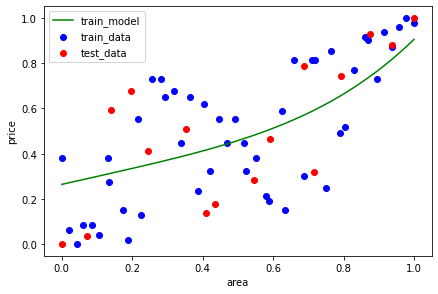

In [43]:
# Plot model:
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.plot(X_train, Y_train_poly_pred, color='green', label='train_model')
# plt.plot(X_test, Y_test_poly_pred, color='purple', label='test_model')
plt.legend()
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [44]:
print("Polynomial Regression with degree = {}".format(degree))
# Polynomial Model coefficient and intercept:
print("Polynomial model coefficient:")
print(poly_model.coef_)
print("Polynomial model intercept: {}".format(poly_model.intercept_))

# poly_model rmse:
print("Polynomial Model RMSE on validate data: {}".format(validate_rmse))
print("Polynomial Model RMSE on test data: {}".format(test_rmse))

Polynomial Regression with degree = 4
Polynomial model coefficient:
[0.         0.35017836 0.         0.         0.28929013]
Polynomial model intercept: [0.26503717]
Polynomial Model RMSE on validate data: 0.2060320254208543
Polynomial Model RMSE on test data: 0.20984961244541822


In [45]:
# score the model with test data:

# Linear score:
print("\n")
print("Linear Model score on train dataset: ", linear_model.score(X_train, Y_train))
print("Linear Model score on test dataset: ", linear_model.score(X_test, Y_test))

# Poly score:
print("\n")
print("Poly Model score on train dataset: ", poly_model.score(X_train_poly, Y_train))
print("Poly Model score on test dataset: ", poly_model.score(X_test_poly, Y_test))



Linear Model score on train dataset:  0.49074476973581327
Linear Model score on test dataset:  0.5021153794598757


Poly Model score on train dataset:  0.5041541041197652
Poly Model score on test dataset:  0.5436909135170818
